In [1]:
using Distributions, Random, Plots; pyplot()
Random.seed!(0)

MersenneTwister(UInt32[0x00000000], Random.DSFMT.DSFMT_state(Int32[748398797, 1073523691, -1738140313, 1073664641, -1492392947, 1073490074, -1625281839, 1073254801, 1875112882, 1073717145  …  943540191, 1073626624, 1091647724, 1073372234, -1273625233, -823628301, 835224507, 991807863, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x0000000000

In [11]:
function SIRmodel2(beta, gamma, I0, M, T)
    t,S,I,R = 0.0, M-I0, I0, 0
    tValue, sValue, iValue, rValue = [0.0], [S], [I], [R]
    while t<T
        infectionRate = beta*I*S
        removalRate = gamma*I
        totalRate = infectionRate+removalRate
        probs = [infectionRate, removalRate]/totalRate
        t += rand(Exponential(1/(totalRate)))
        u = rand()
        if u<probs[1]
            S -= 1; I += 1
        else
            I -= 1; R += 1
        end
        push!(tValue, t)
        push!(sValue, S); push!(iValue, I); push!(rValue, R)
        I == 0 && break
    end
    return [tValue, sValue, iValue, rValue]
end

SIRmodel2 (generic function with 1 method)

In [6]:
beta, gamma = 0.25, 0.1
initialInfect, M= 0.03, 1024
I0 = Int(floor(initialInfect*M))
N = 30

30

In [12]:
tV, sV, iV, rV = SIRmodel2(beta/M, gamma, I0, M, Inf)

4-element Array{Array{Float64,1},1}:
 [0.0, 0.13995321697459753, 0.17185852111528038, 0.20004968159000563, 0.3894732815252844, 0.4878174111421355, 0.5850085480398692, 0.6561390357099522, 0.6982241817988608, 1.0333627414520585  …  86.34741446578106, 87.48001735731933, 88.87185474594635, 88.87555510135705, 89.46509758856196, 91.80395705303157, 94.84766643851407, 97.25165760661208, 98.932398232839, 99.45635899458445]
 [994.0, 993.0, 993.0, 992.0, 992.0, 991.0, 991.0, 990.0, 989.0, 988.0  …  115.0, 115.0, 115.0, 115.0, 114.0, 114.0, 113.0, 113.0, 113.0, 113.0]
 [30.0, 31.0, 30.0, 31.0, 30.0, 31.0, 30.0, 31.0, 32.0, 33.0  …  5.0, 4.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.0, 0.0]
 [0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0  …  904.0, 905.0, 906.0, 907.0, 907.0, 908.0, 908.0, 909.0, 910.0, 911.0]

In [13]:
finals = [SIRmodel2(beta/M, gamma, I0, M, Inf)[4][end] for _ in 1:N]/M

30-element Array{Float64,1}:
 0.8916015625
 0.8994140625
 0.865234375
 0.9072265625
 0.9091796875
 0.900390625
 0.884765625
 0.9189453125
 0.8828125
 0.900390625
 0.8779296875
 0.8779296875
 0.87890625
 ⋮
 0.896484375
 0.90625
 0.8916015625
 0.8955078125
 0.888671875
 0.8828125
 0.90625
 0.8662109375
 0.892578125
 0.9150390625
 0.900390625
 0.90234375

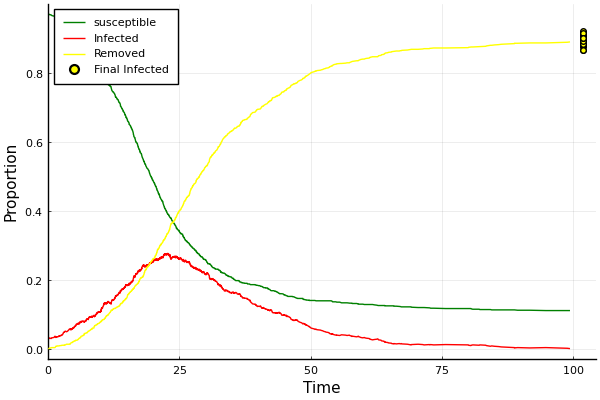

In [14]:
p1 = plot(tV, sV/M, label = "susceptible", c=:green)
plot!(tV,iV/M,label = "Infected", c=:red)
plot!(tV,rV/M,label = "Removed", c=:yellow,xlabel = "Time", ylabel = "Proportion", legend = :topleft, xlim = (0,tV[end]*1.05))
scatter!(tV[end]*1.025*ones(N),finals,c = :yellow, label= "Final Infected")

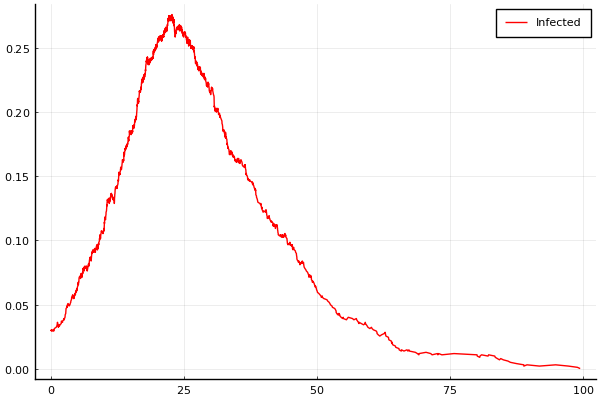

In [15]:
p1 = plot(tV,iV/M,label = "Infected", c=:red)